## Exploratory Data Analysis on Fashion Boutique
<img src="https://i.postimg.cc/Vkp0jKcj/Chat-GPT-Image-Aug-9-2025-01-10-15-PM.png" width="1000" height="600"><br>
### Dataset Overview
The Fashion Boutique company “Fashion Private Limited” wants to understand the customer purchase Dataset represents transactional and product-level data collected from a retail fashion store. It captures diverse aspects of the business, including product details, pricing strategies, seasonal trends, inventory levels, customer feedback, and return behavior. 

* The data set also contains product_id	category	brand	season	size	color	original_price	markdown_percentage	current_price	purchase_date	stock_quantity	customer_rating	is_returned	return_reason
* The Fashion Boutique Dataset is more than numbers; it’s the heartbeat of a retail store, capturing the push and pull between supply, demand, style, and customer satisfaction. Through analysis, we can turn these silent records into a vivid narrative of trends, successes, and opportunities for improvement.

What is Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

In this project, I have selected Black Friday Sales data from kaggle to explore and analyze the sales data on each product category, gender, martial status of customers etc.. We'll use the the python libraries pandas, matplotlib and seaborn to do exploratory data analysis on the Sales dataset.

Here's the outline of the steps we'll follow:

1. Downloading a dataset from an online source
2. Data preparation and cleaning with Pandas
3. Open-ended exploratory analysis and visualization
4. Asking and answering interesting questions
5. Summarizing inferences and drawing conclusions<br>

By the end this project we will get insights about the factors affecting the sales and some other facts about sale.

# 1. Import Libraries & Load Data


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("fashion_boutique_dataset.csv")

In [9]:
df.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,05-07-2025,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,06-08-2025,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,06-08-2025,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,07-07-2025,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,06-08-2025,10,NaN,False,NaN


In [10]:
df.tail()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
2171,FB002172,Tops,Mango,Summer,XL,Black,31.41,0.0,31.41,06-08-2025,10,2.1,False,NaN
2172,FB002173,Dresses,Banana Republic,Winter,L,Brown,50.58,0.0,50.58,06-08-2025,1,3.1,True,Changed Mind
2173,FB002174,Accessories,Banana Republic,Winter,NaN,Beige,79.37,54.8,35.88,06-08-2025,40,2.6,False,NaN
2174,FB002175,Bottoms,Ann Taylor,Summer,XL,Pink,105.52,0.0,105.52,06-08-2025,20,4.9,True,Size Issue
2175,FB002176,Shoes,Ann Taylor,Summer,XXL,White,154.02,0.0,154.02,06-08-2025,23,1.3,False,NaN


In [11]:
df.shape

(2176, 14)

## Reading information about data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           2176 non-null   object 
 1   category             2176 non-null   object 
 2   brand                2176 non-null   object 
 3   season               2176 non-null   object 
 4   size                 1685 non-null   object 
 5   color                2176 non-null   object 
 6   original_price       2176 non-null   float64
 7   markdown_percentage  2176 non-null   float64
 8   current_price        2176 non-null   float64
 9   purchase_date        2176 non-null   object 
 10  stock_quantity       2176 non-null   int64  
 11  customer_rating      1814 non-null   float64
 12  is_returned          2176 non-null   bool   
 13  return_reason        320 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 223.3+ KB


In [13]:
df.columns

Index(['product_id', 'category', 'brand', 'season', 'size', 'color',
       'original_price', 'markdown_percentage', 'current_price',
       'purchase_date', 'stock_quantity', 'customer_rating', 'is_returned',
       'return_reason'],
      dtype='object')

In [15]:
print(df.nunique())

product_id             2176
category                  6
brand                     8
season                    4
size                      6
color                    11
original_price         2061
markdown_percentage     458
current_price          2025
purchase_date           273
stock_quantity           51
customer_rating          41
is_returned               2
return_reason             6
dtype: int64


In [14]:
df.duplicated().value_counts()

False    2176
Name: count, dtype: int64

We having total 2176 number of rows data including NaN value with no duplicated data. So, first task to convert the given data into useful data.

## Data Preprocessing

### 1.Category & Brand Analysis

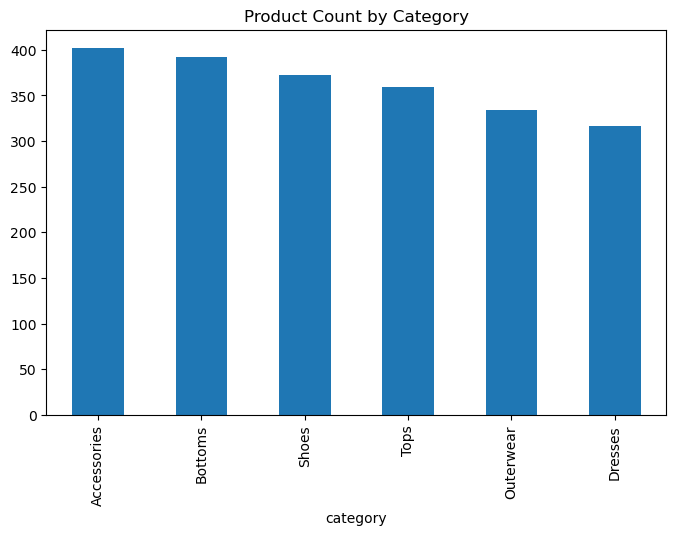

In [23]:
plt.figure(figsize=(8,5))
df['category'].value_counts().plot(kind='bar')
plt.title("Product Count by Category")
plt.show()

In [28]:
df.category.unique()

array(['Outerwear', 'Tops', 'Accessories', 'Shoes', 'Bottoms', 'Dresses'],
      dtype=object)

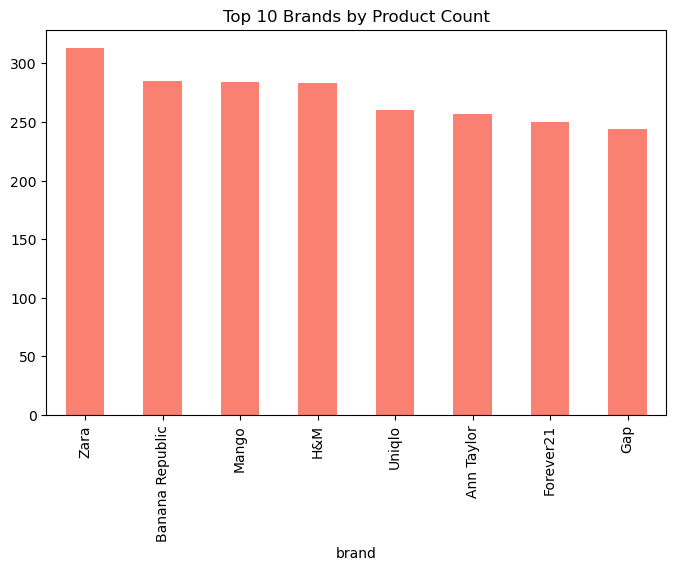

In [26]:
plt.figure(figsize=(8,5))
df['brand'].value_counts().head(10).plot(kind='bar',color="salmon")
plt.title("Top 10 Brands by Product Count")
plt.show()

In [27]:
df.brand.unique()

array(['Zara', 'Uniqlo', 'Banana Republic', 'Mango', 'H&M', 'Ann Taylor',
       'Gap', 'Forever21'], dtype=object)

### 2.Price Distribution

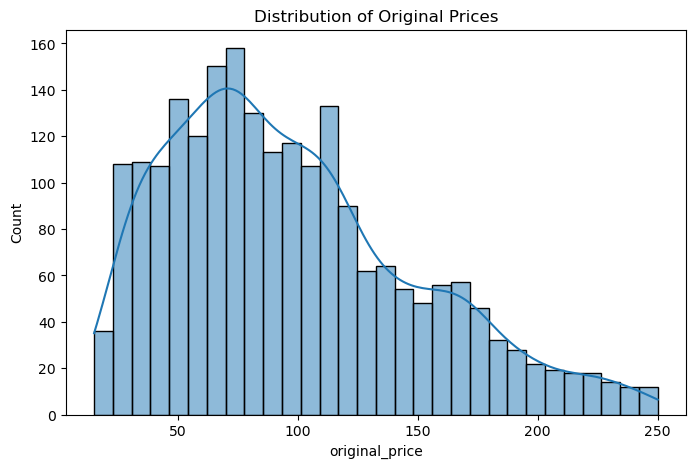

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(df['original_price'], bins=30, kde=True)
plt.title("Distribution of Original Prices")
plt.show()

### 3.Seasonal Trends


In [58]:
season =['Summer','Fall','Winter','Spring']

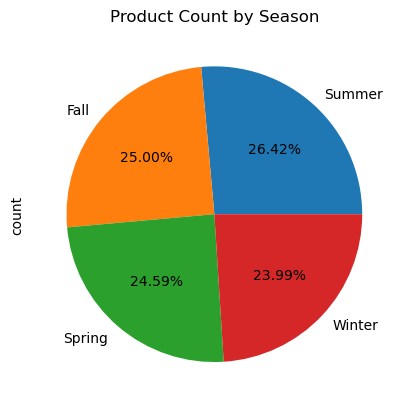

In [77]:
df['season'].value_counts().plot(kind='pie',autopct='%1.2f%%', title="Product Count by Season")
plt.show()


In [42]:
df.season.unique()

array(['Spring', 'Winter', 'Fall', 'Summer'], dtype=object)

### 3.Discounts Analysis

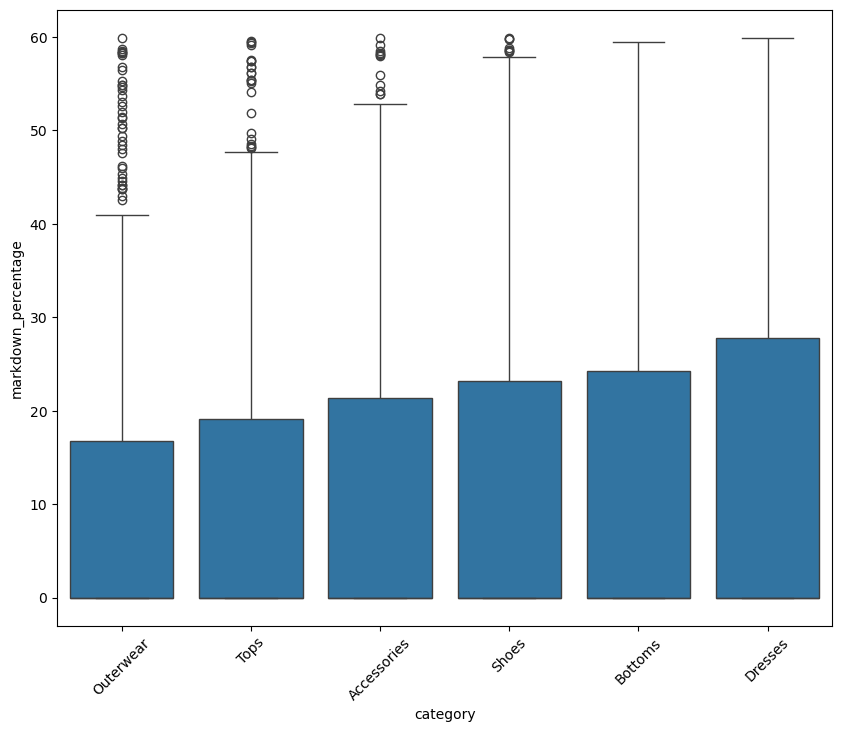

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(x='category', y='markdown_percentage', data=df)
plt.xticks(rotation=45)
plt.show()


### 4.Ratings Analysis


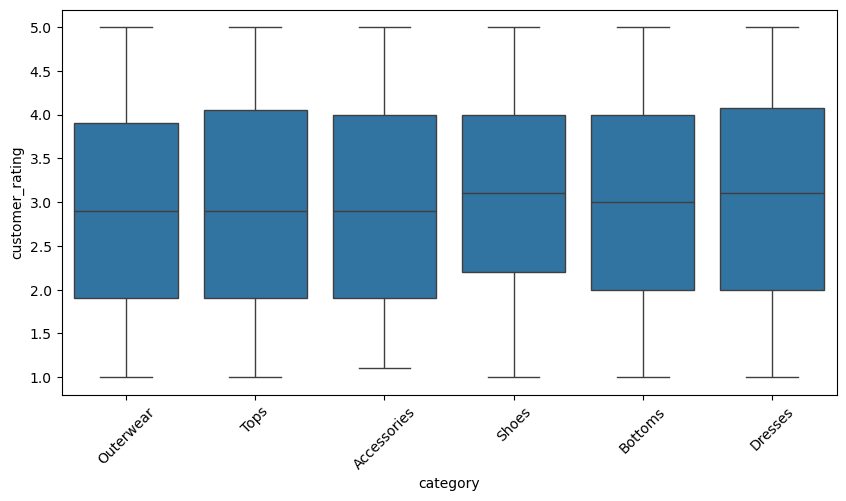

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(x='category', y='customer_rating', data=df)
plt.xticks(rotation=45)
plt.show()


### 5.Returns Analysis

Return Rate (%):
 is_returned
False    85.294118
True     14.705882
Name: proportion, dtype: float64


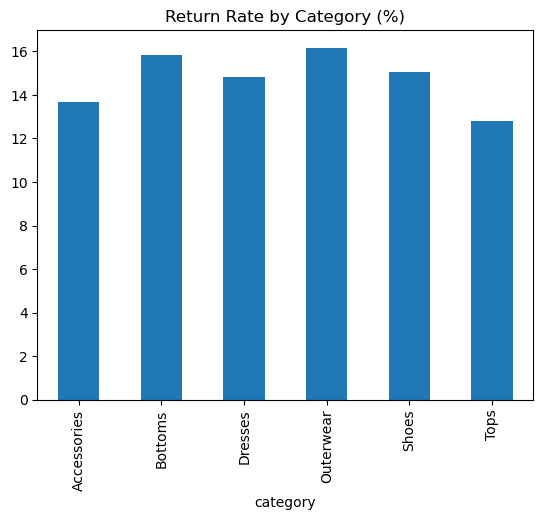

In [64]:
return_rate = df['is_returned'].value_counts(normalize=True) * 100
print("Return Rate (%):\n", return_rate)

(df.groupby('category')['is_returned']
   .mean()
   .mul(100)
   .plot(kind='bar', title="Return Rate by Category (%)"))
plt.show()


### 6.Correlation Heatmap


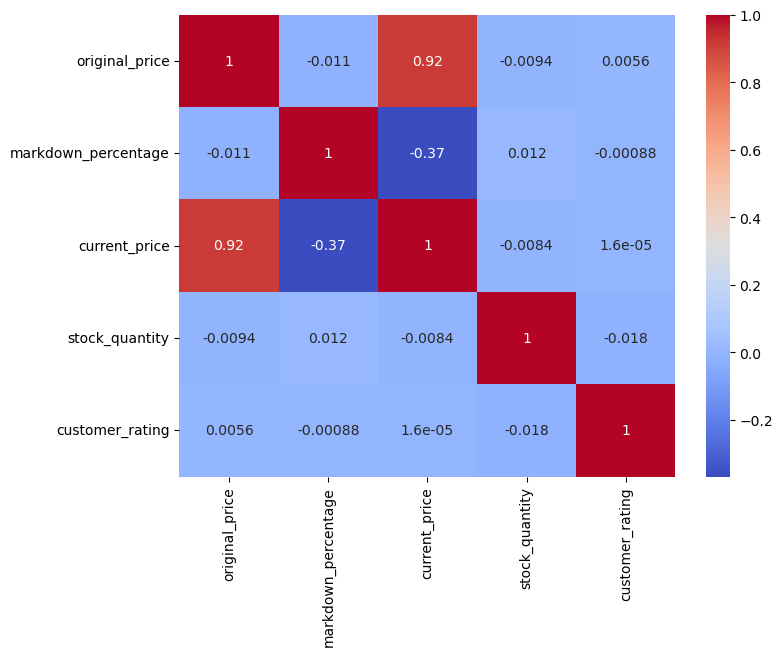

In [66]:
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()


# Data visualization

### 1. Average Price by Product Category

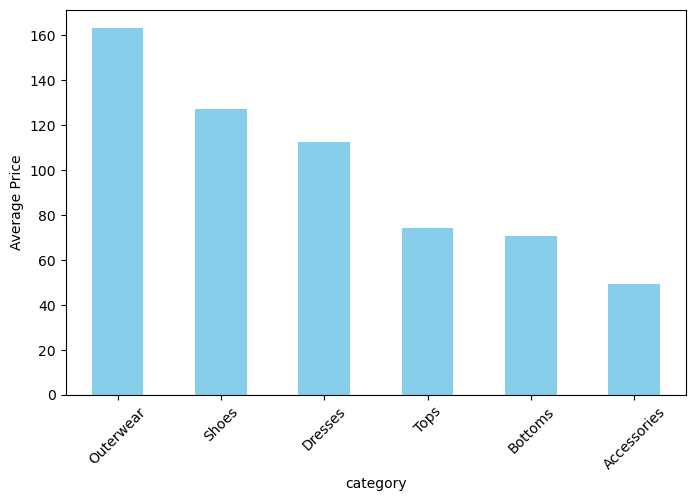

In [70]:
plt.figure(figsize=(8,5))
df.groupby("category")["original_price"].mean().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

### 2. Top 10 Brands by Product Count

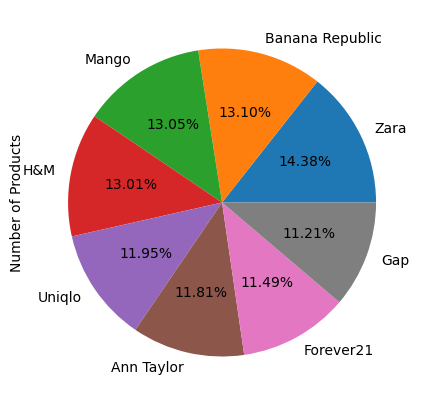

In [74]:
plt.figure(figsize=(8,5))
df['brand'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%')
plt.ylabel("Number of Products")
plt.show()

### 3. Product Count by Season

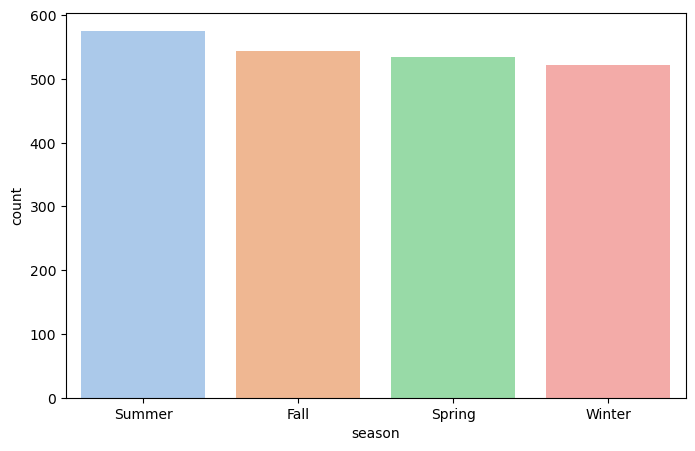

In [79]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="season", order=df["season"].value_counts().index, palette="pastel")
plt.show()

### 4. Distribution of Discounts

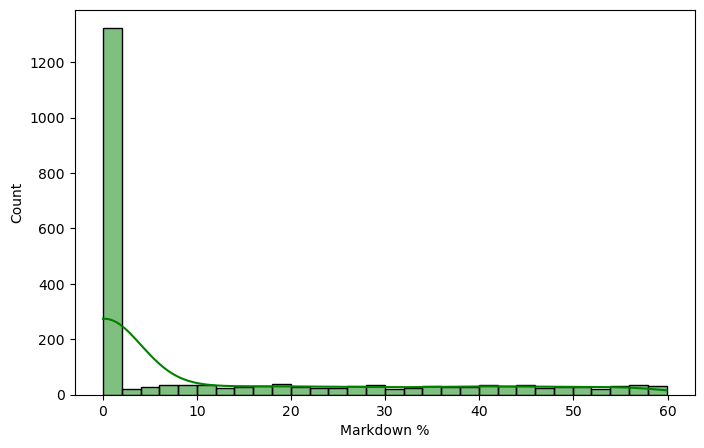

In [81]:
plt.figure(figsize=(8,5))
sns.histplot(df['markdown_percentage'], bins=30, kde=True, color="green")
plt.xlabel("Markdown %")
plt.show()

### 5. Customer Ratings Distribution

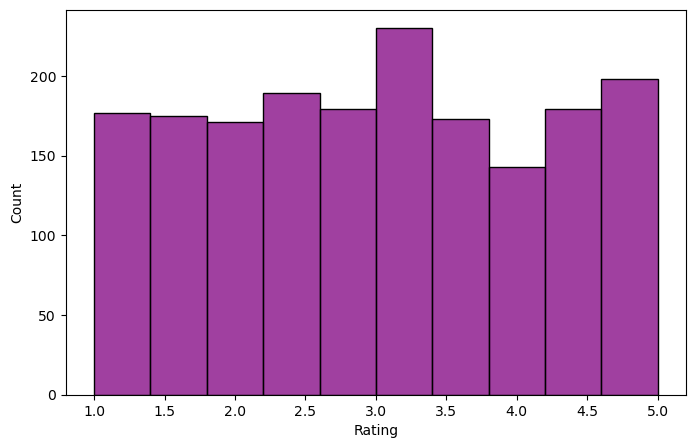

In [83]:
plt.figure(figsize=(8,5))
sns.histplot(df['customer_rating'], bins=10, kde=False, color="purple")
plt.xlabel("Rating")
plt.show()

### 6. Top 5 Brands by Return Rate

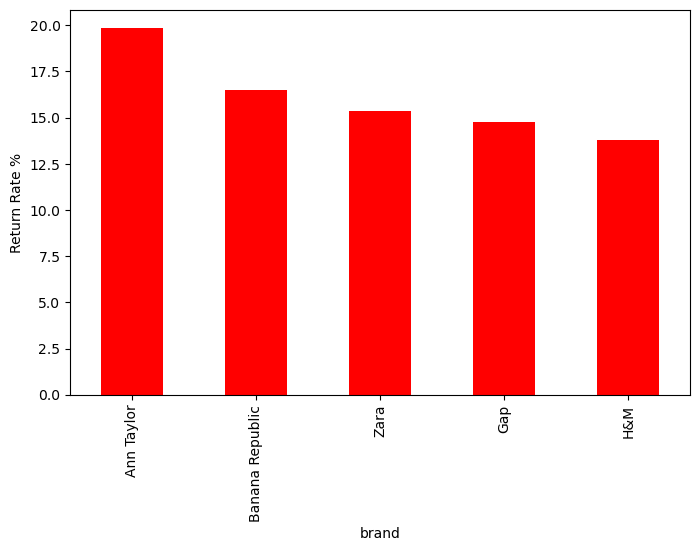

In [85]:
return_rate_brand = df.groupby("brand")['is_returned'].mean().sort_values(ascending=False).head(5) * 100
plt.figure(figsize=(8,5))
return_rate_brand.plot(kind='bar', color="red")
plt.ylabel("Return Rate %")
plt.show()


### 7. Price vs Customer Rating Scatterplot

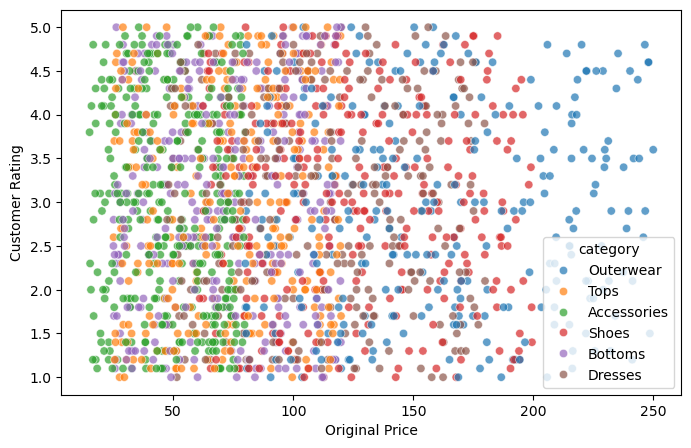

In [87]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="original_price", y="customer_rating", hue="category", alpha=0.7, edgecolor="w")
plt.xlabel("Original Price")
plt.ylabel("Customer Rating")
plt.show()

# Summary:

In the Given dataset. I explored and learned many things like,
* In the process of cleaning the dataset I used Pandas and Numpy libraries. Using pandas and numpy I removed unwanted(useless) data and created new data frames and got useful data for my research. After cleaning my data I used Seaborn and Matplotlib libraries to read my data by visualizing it. I created questions regarding my research I tried to solve it by visualizing and applying conditions.
* Load libraries & data
* Quick preview
* Inspect types & convert
* Missing values & duplicates
* Basic stats
* Clean & standardize
* Feature engineering
* Univariate visuals
* Bivariate checks
* Time/seasonal analysis
* Returns & ratings deep dive
* Multivariate & correlation
* Outliers & anomalies
* Synthesize insights
* Next steps / action items

* Now, they want to build a model to predict the customer purchase Dataset represents transactional and product-level data collected from a retail fashion store. It captures diverse aspects of the business, including product details, pricing strategies, seasonal trends, inventory levels, customer feedback, and return behavior. By seeing this EDA we can fulfill this requirements.

## Future work

##### Customer Behavior Prediction 
Build machine learning models to predict purchases, returns, or ratings using the explored features.

##### Dynamic Pricing Strategy 
Use price and discount analysis to recommend optimal pricing for higher sales and lower returns.

##### Seasonal & Trend Forecasting
Apply time-series forecasting to predict demand for categories/brands in upcoming seasons.

## References

* Medium: https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676
* Kaggle: https://www.kaggle.com/code/spscientist/a-simple-tutorial-on-exploratory-data-analysis
* kaggle: https://www.kaggle.com/datasets/pratyushpuri/retail-fashion-boutique-data-sales-analytics-2025